In [1]:
# NOTE: run all the blocks step by step

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from random import random

In [69]:
dataset=pd.read_csv('Housing.csv')
dataset=dataset.drop(columns=['id','recroom','fullbase','gashw','airco'])

# train set
train=dataset.values.tolist()
#test set
test=dataset.drop(columns=['prefarea']).values.tolist()
#test=[dataset['prefarea'].values.tolist()]

In [11]:
#bias=1
#print(train[0])
#weights=[1 for i in train[0]]

In [70]:
#predict 
def predict_output(inputs, weights):
    summation = weights[0]
    for i in range(len(inputs)-1):
        summation += weights[i+1]*inputs[i]
    return 1.0 if summation > 0.0 else 0.0

In [179]:
def train_weights(train, learning_rate, epochs):
    weights = [1 for i in range(len(train[0]))]
    E=[]
    for epoch in range(epochs):
        sum_error = []
        E.append(epochs)
        for row in train:
            prediction = predict_output(row, weights)
            error = row[-1] - prediction
            sum_error.append(error**2)
            weights[0] = weights[0] + learning_rate * error
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1]+learning_rate*error*row[i]            
        plt.scatter(epoch,sum_error[epoch])
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error vs Epoch')
    plt.show()
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
    return weights

In [172]:
def single_layer_perceptron(train, test, learning_rate, epochs):
    predictions = []
    weights = train_weights(train, learning_rate, epochs)
    #print(weights)
    for row in test:
        prediction = int(predict_output(row, weights))
        predictions.append(prediction)
    return(predictions)

#perceptron(train,test,0.1,5)

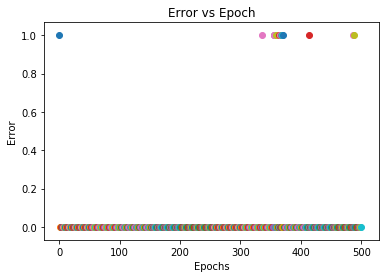

In [180]:
predict=single_layer_perceptron(train,test,0.1,500)
actual_op=dataset['prefarea'].values.tolist()

#plt.scatter()

In [166]:
def evaluate_algo(predict,test):
    count=0
    for i in range(len(test)):
        if(predict[i]==test[i]):
            count+=1
    accuracy=(count/len(predict))*100
    return accuracy

In [167]:
print("Accuracy =",evaluate_algo(predict,actual_op),"%")

Accuracy = 73.992673992674 %
